In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install pandas_profiling

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and chaarts
import seaborn as sns #drawing statistical graphics
%matplotlib inline
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<ipython-input-4-e54e0e399b18>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


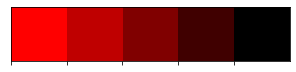

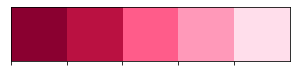

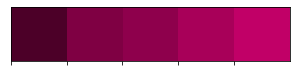

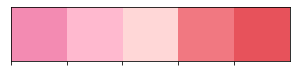

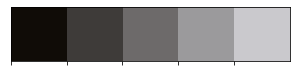

In [6]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [7]:
# --- Importing Dataset ---
gold_data = pd.read_csv("gld_price_data.csv")

# --- Reading Dataset ---
gold_data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [8]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

SPX,GLD,USO,SLV,EUR/USD
2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
1654.315776,122.732875,31.842221,20.084997,1.283653
519.111540,23.283346,19.523517,7.092566,0.131547
676.530029,70.000000,7.960000,8.850000,1.039047
1239.874969,109.725000,14.380000,15.570000,1.171313
1551.434998,120.580002,33.869999,17.268500,1.303297
2073.010070,132.840004,37.827501,22.882500,1.369971
2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', gold_data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', gold_data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
gold_data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 2290
Total Columns: 6
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)

In [11]:
pp.ProfileReport(gold_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

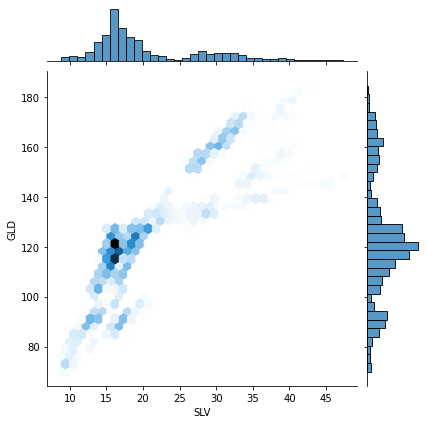

In [12]:
sns.jointplot(x='SLV',y='GLD',kind='hex',data=gold_data)

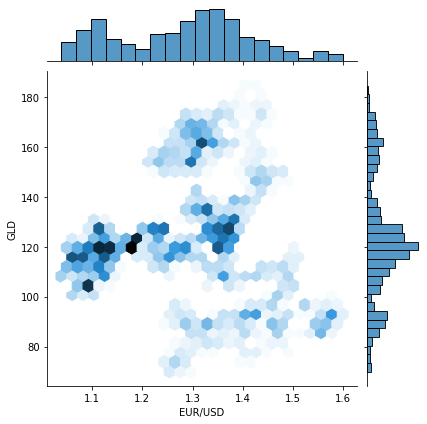

In [13]:
sns.jointplot(x='EUR/USD',y='GLD',kind='hex',data=gold_data)

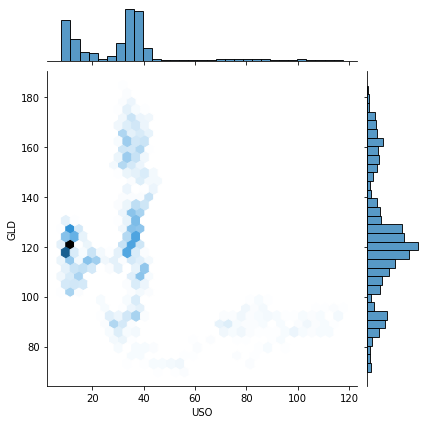

In [14]:
sns.jointplot(x='USO',y='GLD',kind='hex',data=gold_data)

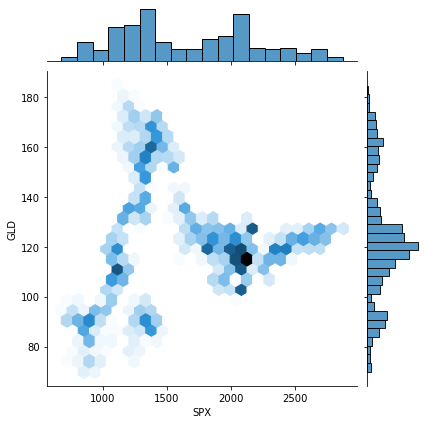

In [15]:
sns.jointplot(x='SPX',y='GLD',kind='hex',data=gold_data)

<AxesSubplot:>

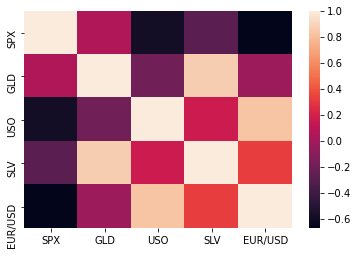

In [16]:
sns.heatmap(gold_data.corr())

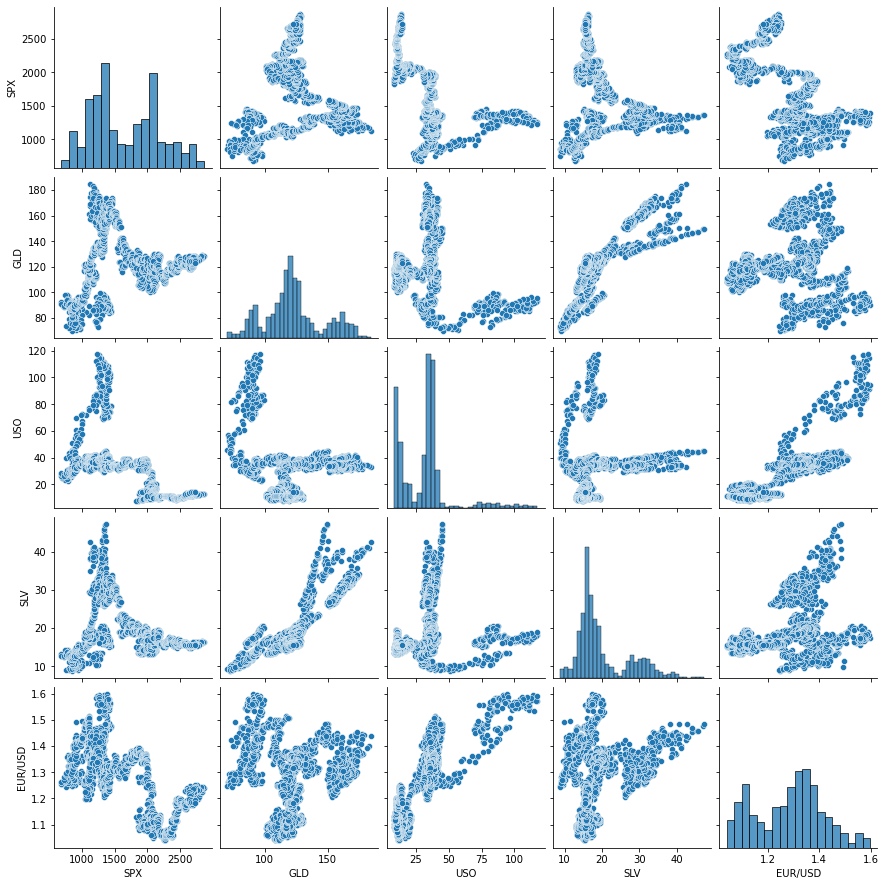

In [17]:
sns.pairplot(gold_data)

In [18]:
!pip install autoviz

Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Date,2290,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
SPX,2277,float64,0,0.000000,99.432314,0,
EUR/USD,2066,float64,0,0.000000,90.218341,0,
GLD,1930,float64,0,0.000000,84.279476,0,
USO,1514,float64,0,0.000000,66.113537,0,skewed: cap or drop outliers
SLV,1331,float64,0,0.000000,58.122271,0,skewed: cap or drop outliers


    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Date']
Number of All Scatter Plots = 15
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


<Figure size 720x360 with 0 Axes>

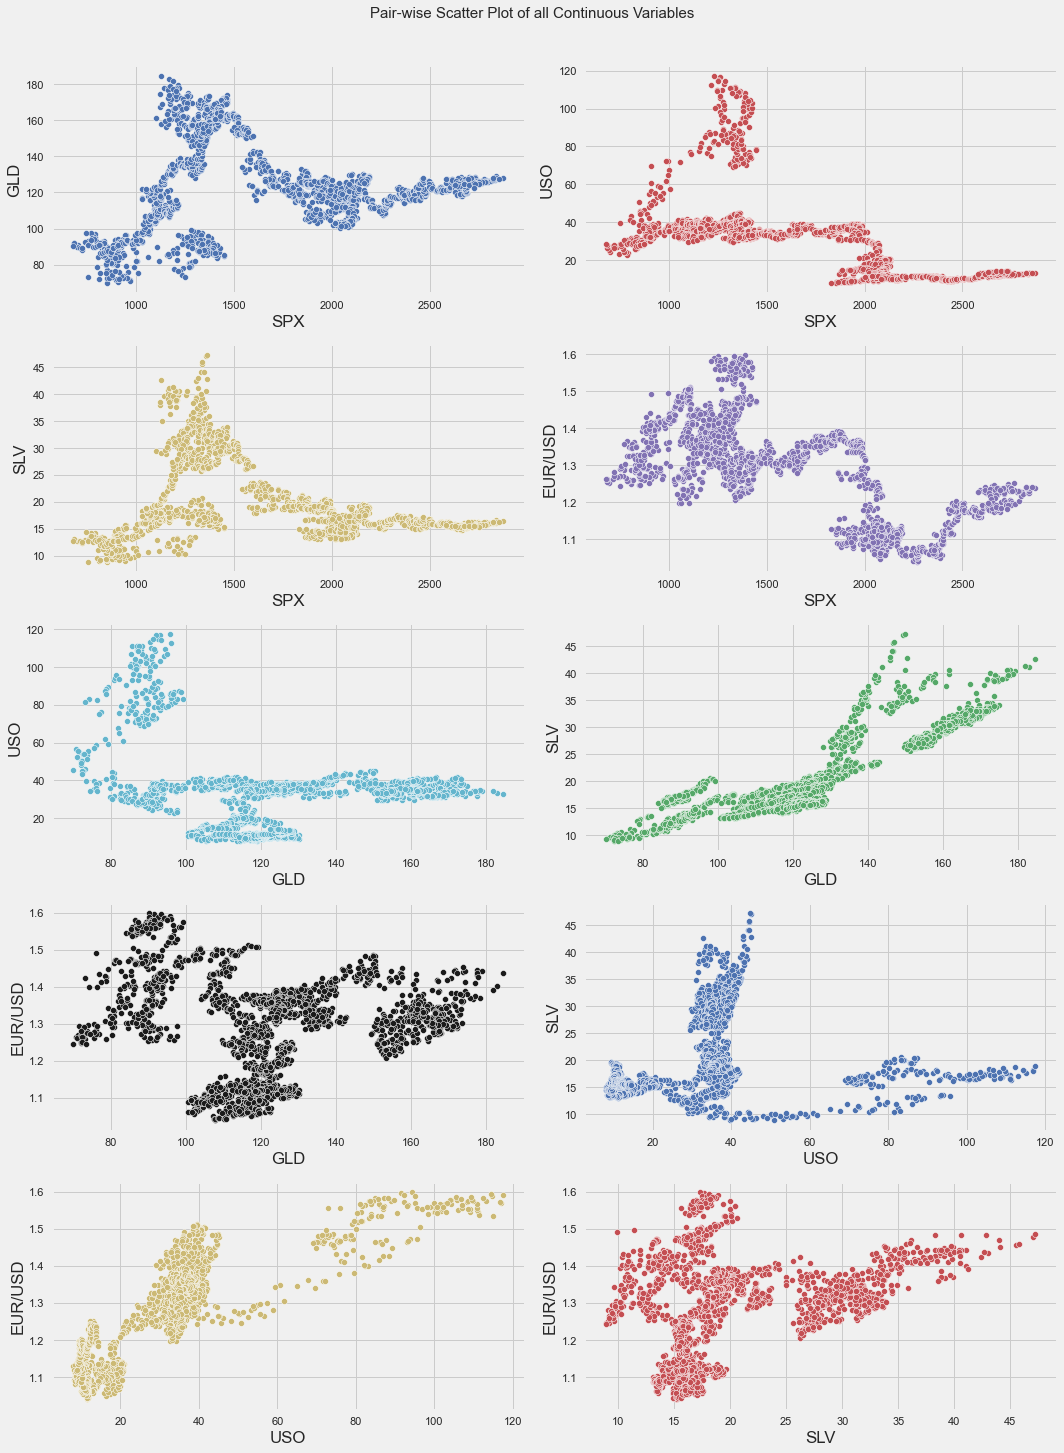

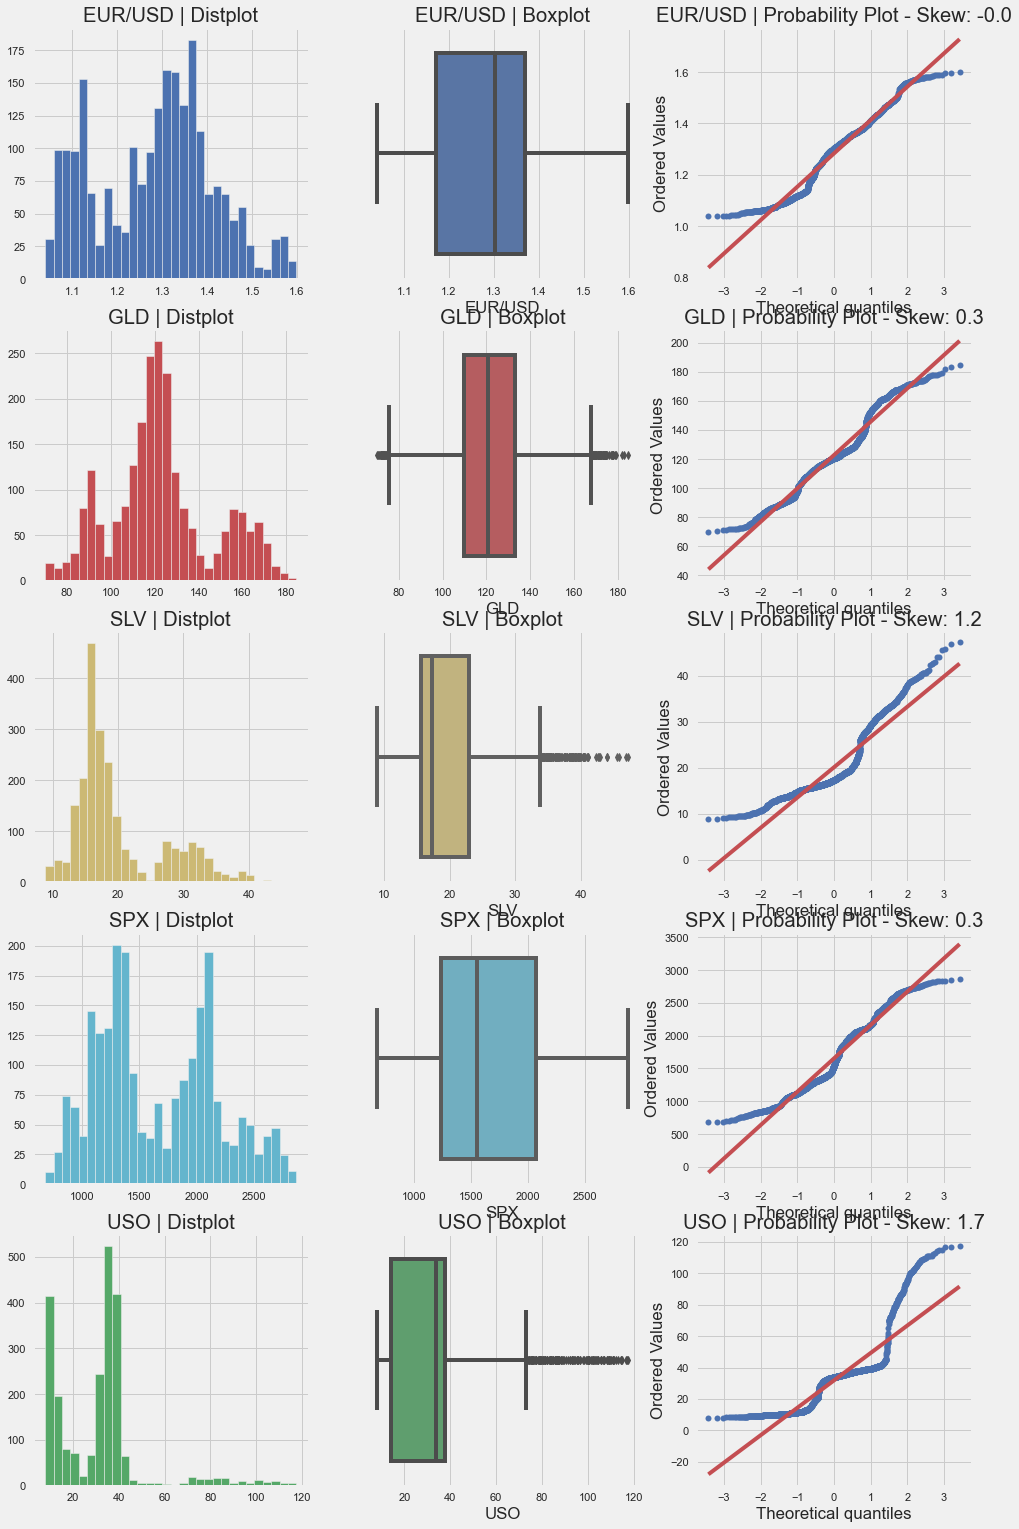

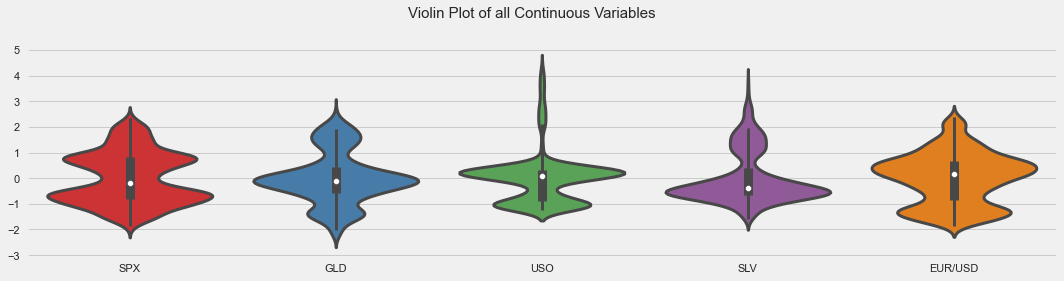

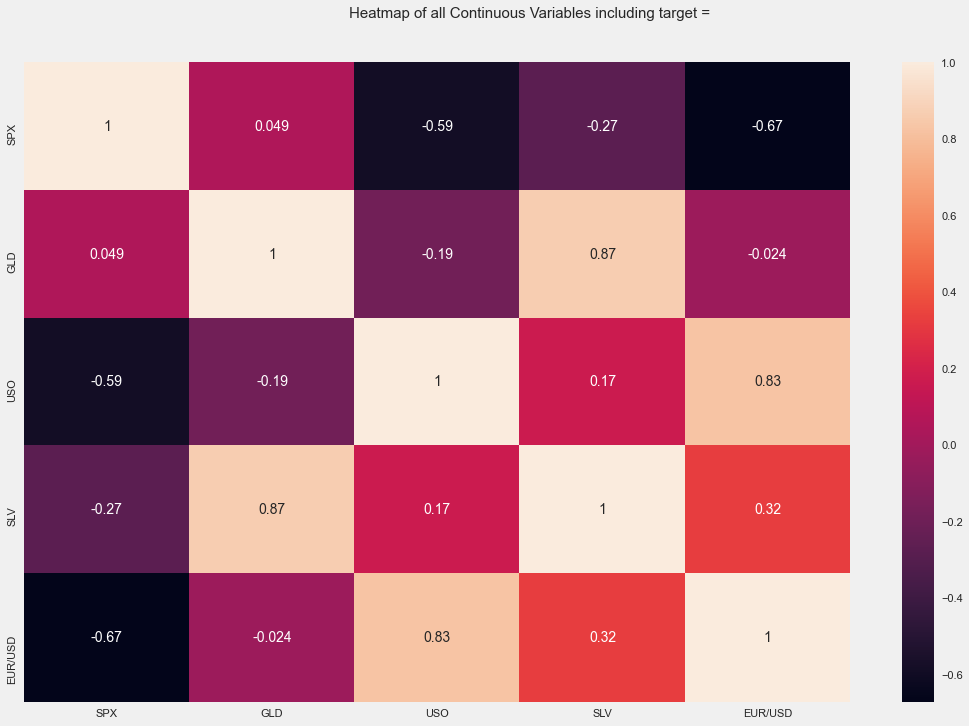

In [34]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('gld_price_data.csv')
plt.show()

<AxesSubplot:>

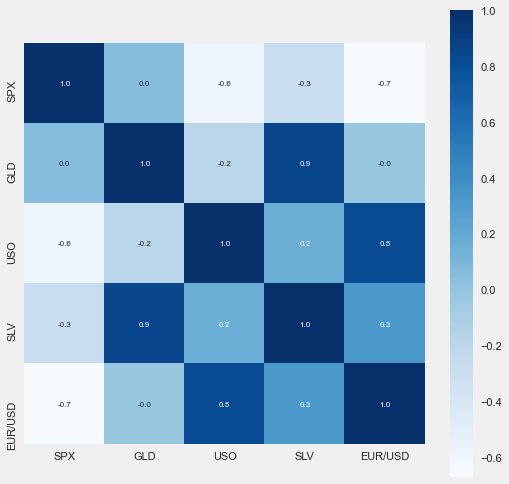

In [35]:
correlation = gold_data.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

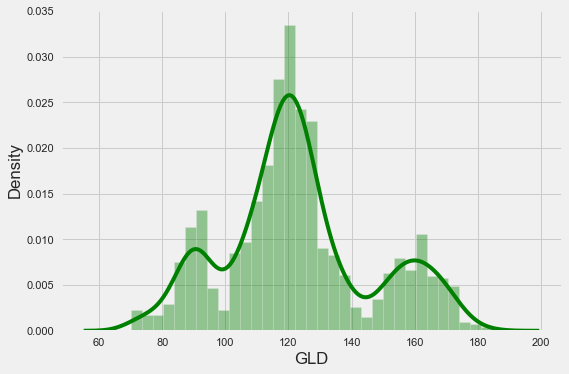

In [37]:
sns.distplot(gold_data['GLD'],color='green')

In [38]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [39]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [40]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [44]:
test_data_prediction = regressor.predict(X_test)

In [45]:
print(test_data_prediction)

[168.61159957  82.01640003 115.78570032 127.59980044 120.58770143
 154.66429772 150.40859891 125.85460071 117.44849876 125.89240102
 116.56890165 171.95630096 141.23899877 167.8571986  115.3952003
 117.77050062 138.64440339 170.11630131 158.71920322 156.00049943
 155.18900019 125.04029976 175.32009989 157.4866031  125.29750028
  93.91659984  78.36170026 120.46640021 119.08319931 167.44620058
  88.2255004  125.28470021  90.92090081 117.68370053 121.01369932
 135.97530081 115.51690142 115.11690056 148.52039992 107.12160096
 104.66430239  87.17139814 126.47010091 118.10139995 153.4830994
 119.64510027 108.31439986 107.94759857  93.1382004  127.0993979
  74.81960037 113.6707995  121.2342004  111.44589884 118.76679862
 121.12019891 159.7009002  169.18860093 146.90719646  86.02829903
  94.41300034  87.00639912  90.49000022 118.94340088 126.50630038
 127.64379997 170.21059931 122.34649981 117.3446989   98.2902005
 168.57770087 142.94019814 131.2766025  121.1333021  121.13649942
 120.0138005  

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887421869729113


In [47]:
Y_test = list(Y_test)

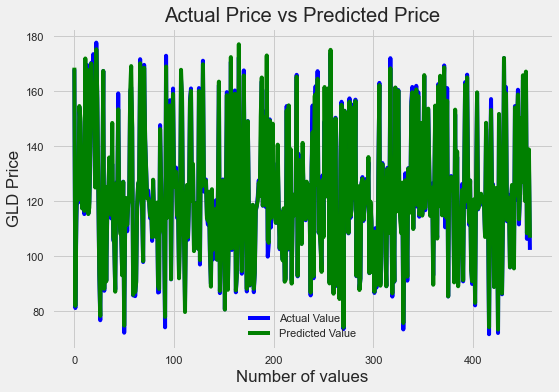

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()